In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_gk = 'https://fbref.com/en/comps/Big5/keepers/players/Big-5-European-Leagues-Stats'
url_gkad = 'https://fbref.com/en/comps/Big5/keepersadv/players/Big-5-European-Leagues-Stats'

In [4]:
data_gk = pd.read_html(url_gk, header=1)[0]
data_gk = data_gk[data_gk['Player'] != 'Player']
data_gk = data_gk.drop(columns=['Rk', 'Matches'])
data_gk

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1
0,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,21-135,2000,4,4,360,...,1,2,1,1,25.0,0,0,0,0,NaN
1,Doğan Alemdar,tr TUR,GK,Rennes,fr Ligue 1,19-193,2002,12,12,1080,...,6,1,5,4,33.3,2,1,1,0,50.0
2,Alisson,br BRA,GK,Liverpool,eng Premier League,29-220,1992,33,33,2970,...,24,7,2,20,60.6,0,0,0,0,NaN
3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,29-072,1993,1,1,90,...,0,0,1,0,0.0,0,0,0,0,NaN
4,Kepa Arrizabalaga,es ESP,GK,Chelsea,eng Premier League,27-219,1994,4,4,360,...,2,1,1,2,50.0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Guglielmo Vicario,it ITA,GK,Empoli,it Serie A,25-215,1996,36,36,3240,...,9,10,17,6,16.7,9,5,1,3,16.7
205,Freddie Woodman,eng ENG,GK,Newcastle Utd,eng Premier League,25-067,1997,4,4,360,...,0,1,3,0,0.0,3,2,1,0,33.3
206,Robin Zentner,de GER,GK,Mainz 05,de Bundesliga,27-194,1994,32,32,2880,...,12,6,14,10,31.3,5,4,1,0,20.0
208,Luca Zidane,fr FRA,"GK,MF",Rayo Vallecano,es La Liga,23-362,1998,7,7,555,...,0,1,6,0,0.0,0,0,0,0,NaN


In [5]:
data_gkad = pd.read_html(url_gkad, header=1)[0]
data_gkad = data_gkad[data_gkad['Player'] != 'Player']
data_gkad = data_gkad.drop(columns=['Rk', 'Matches'])
data_gkad

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,GA,PKA,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,21-135,2000,4.0,5,0,...,36.8,26,38.5,38.3,35,2,5.7,5,1.25,17.3
1,Doğan Alemdar,tr TUR,GK,Rennes,fr Ligue 1,19-193,2002,12.0,13,1,...,33.5,70,84.3,57.7,108,5,4.6,14,1.17,15.2
2,Alisson,br BRA,GK,Liverpool,eng Premier League,29-220,1992,33.0,21,0,...,29.6,160,45.0,39.6,206,20,9.7,53,1.61,17.8
3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,29-072,1993,1.0,1,0,...,49.7,14,71.4,53.2,13,1,7.7,0,0.00,7.0
4,Kepa Arrizabalaga,es ESP,GK,Chelsea,eng Premier League,27-219,1994,4.0,2,0,...,30.8,21,28.6,30.2,31,1,3.2,5,1.25,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Guglielmo Vicario,it ITA,GK,Empoli,it Serie A,25-215,1996,36.0,69,5,...,32.0,249,45.8,39.7,370,33,8.9,19,0.53,13.5
205,Freddie Woodman,eng ENG,GK,Newcastle Utd,eng Premier League,25-067,1997,4.0,12,2,...,43.3,43,65.1,52.0,33,2,6.1,0,0.00,11.6
206,Robin Zentner,de GER,GK,Mainz 05,de Bundesliga,27-194,1994,32.0,42,4,...,38.1,235,49.4,43.3,252,23,9.1,48,1.50,17.2
208,Luca Zidane,fr FRA,"GK,MF",Rayo Vallecano,es La Liga,23-362,1998,6.2,9,0,...,38.1,46,63.0,50.0,49,4,8.2,2,0.32,12.4


In [6]:
data_gk.iloc[:, 7:] = data_gk.iloc[:, 7:].astype(float)
data_gkad.iloc[:, 7:] = data_gkad.iloc[:, 7:].astype(float)
data_gkad = data_gkad.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])

In [7]:
player_data = pd.merge(data_gk, data_gkad, on="Player")
player_data = player_data.drop_duplicates(subset='Player')

In [8]:
player_data

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,21-135,2000,4.0,4.0,360.0,...,36.8,26.0,38.5,38.3,35.0,2.0,5.7,5.0,1.25,17.3
1,Doğan Alemdar,tr TUR,GK,Rennes,fr Ligue 1,19-193,2002,12.0,12.0,1080.0,...,33.5,70.0,84.3,57.7,108.0,5.0,4.6,14.0,1.17,15.2
2,Alisson,br BRA,GK,Liverpool,eng Premier League,29-220,1992,33.0,33.0,2970.0,...,29.6,160.0,45.0,39.6,206.0,20.0,9.7,53.0,1.61,17.8
3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,29-072,1993,1.0,1.0,90.0,...,49.7,14.0,71.4,53.2,13.0,1.0,7.7,0.0,0.0,7.0
4,Kepa Arrizabalaga,es ESP,GK,Chelsea,eng Premier League,27-219,1994,4.0,4.0,360.0,...,30.8,21.0,28.6,30.2,31.0,1.0,3.2,5.0,1.25,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Guglielmo Vicario,it ITA,GK,Empoli,it Serie A,25-215,1996,36.0,36.0,3240.0,...,32.0,249.0,45.8,39.7,370.0,33.0,8.9,19.0,0.53,13.5
202,Freddie Woodman,eng ENG,GK,Newcastle Utd,eng Premier League,25-067,1997,4.0,4.0,360.0,...,43.3,43.0,65.1,52.0,33.0,2.0,6.1,0.0,0.0,11.6
203,Robin Zentner,de GER,GK,Mainz 05,de Bundesliga,27-194,1994,32.0,32.0,2880.0,...,38.1,235.0,49.4,43.3,252.0,23.0,9.1,48.0,1.5,17.2
204,Luca Zidane,fr FRA,"GK,MF",Rayo Vallecano,es La Liga,23-362,1998,7.0,7.0,555.0,...,38.1,46.0,63.0,50.0,49.0,4.0,8.2,2.0,0.32,12.4


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

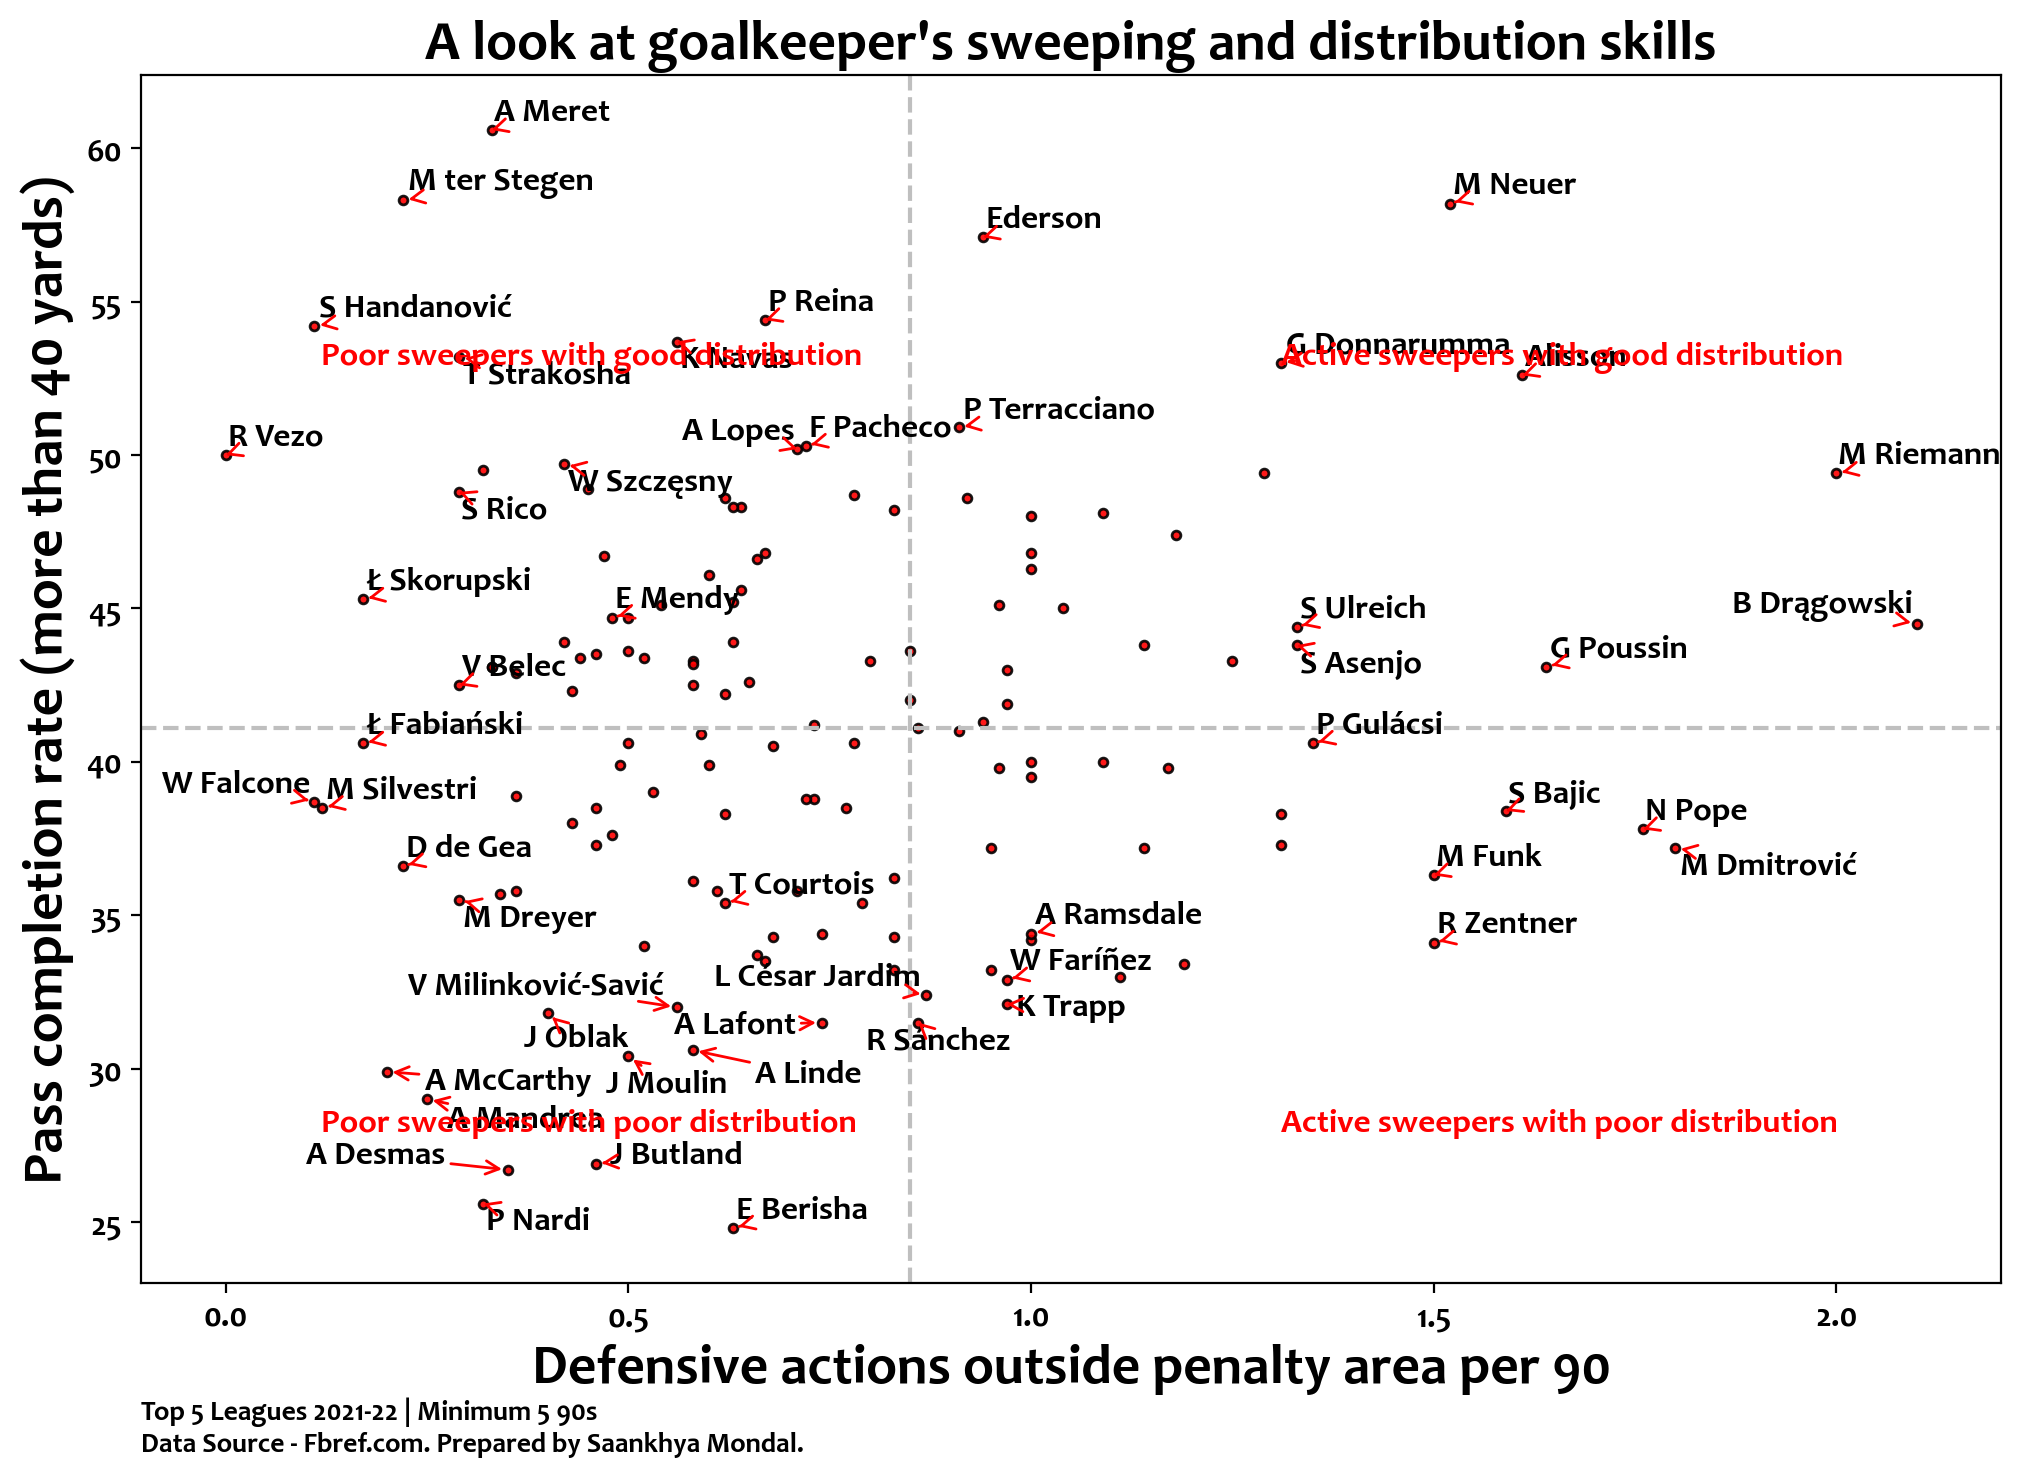

In [9]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
gks = ['Neuer', 'Alisson', 'Mendy', 'Ter Stegen', 'Oblak', 'Ederson', 'De Gea', 'Ramsdale', 'Courtois', 'Arrizabalaga']
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.axhline(data['Cmp%'].quantile(0.5), ls='--', lw=1.5, c='#BFBFBF')
ax.axvline(data['#OPA/90'].quantile(0.65), ls='--', lw=1.5, c='#BFBFBF')

outlier_top = data['Cmp%'].quantile(0.900)
outlier_bottom = data['Cmp%'].quantile(0.100)
outlier_right = data['#OPA/90'].quantile(0.900)
outlier_left = data['#OPA/90'].quantile(0.100)

def check_name_present(name):
    for i in gks:
        if i in name:
            return True
    return False

par_x = list(data['#OPA/90'].astype(float))
par_y = list(data['Cmp%'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))


fig.text(0.6,0.7,'Active sweepers with good distribution', color = 'red', size=12)
fig.text(0.6,0.22,'Active sweepers with poor distribution', color = 'red', size=12)
fig.text(0.2,0.7,'Poor sweepers with good distribution', color = 'red', size=12)
fig.text(0.2,0.22,'Poor sweepers with poor distribution', color = 'red', size=12)


ax.set_xlabel('Defensive actions outside penalty area per 90', fontsize=20)
ax.set_ylabel('Pass completion rate (more than 40 yards)', fontsize=20)
ax.set_title('A look at goalkeeper\'s sweeping and distribution skills', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

posx and posy should be finite values


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

posx and posy should be finite values
posx and posy should be finite values


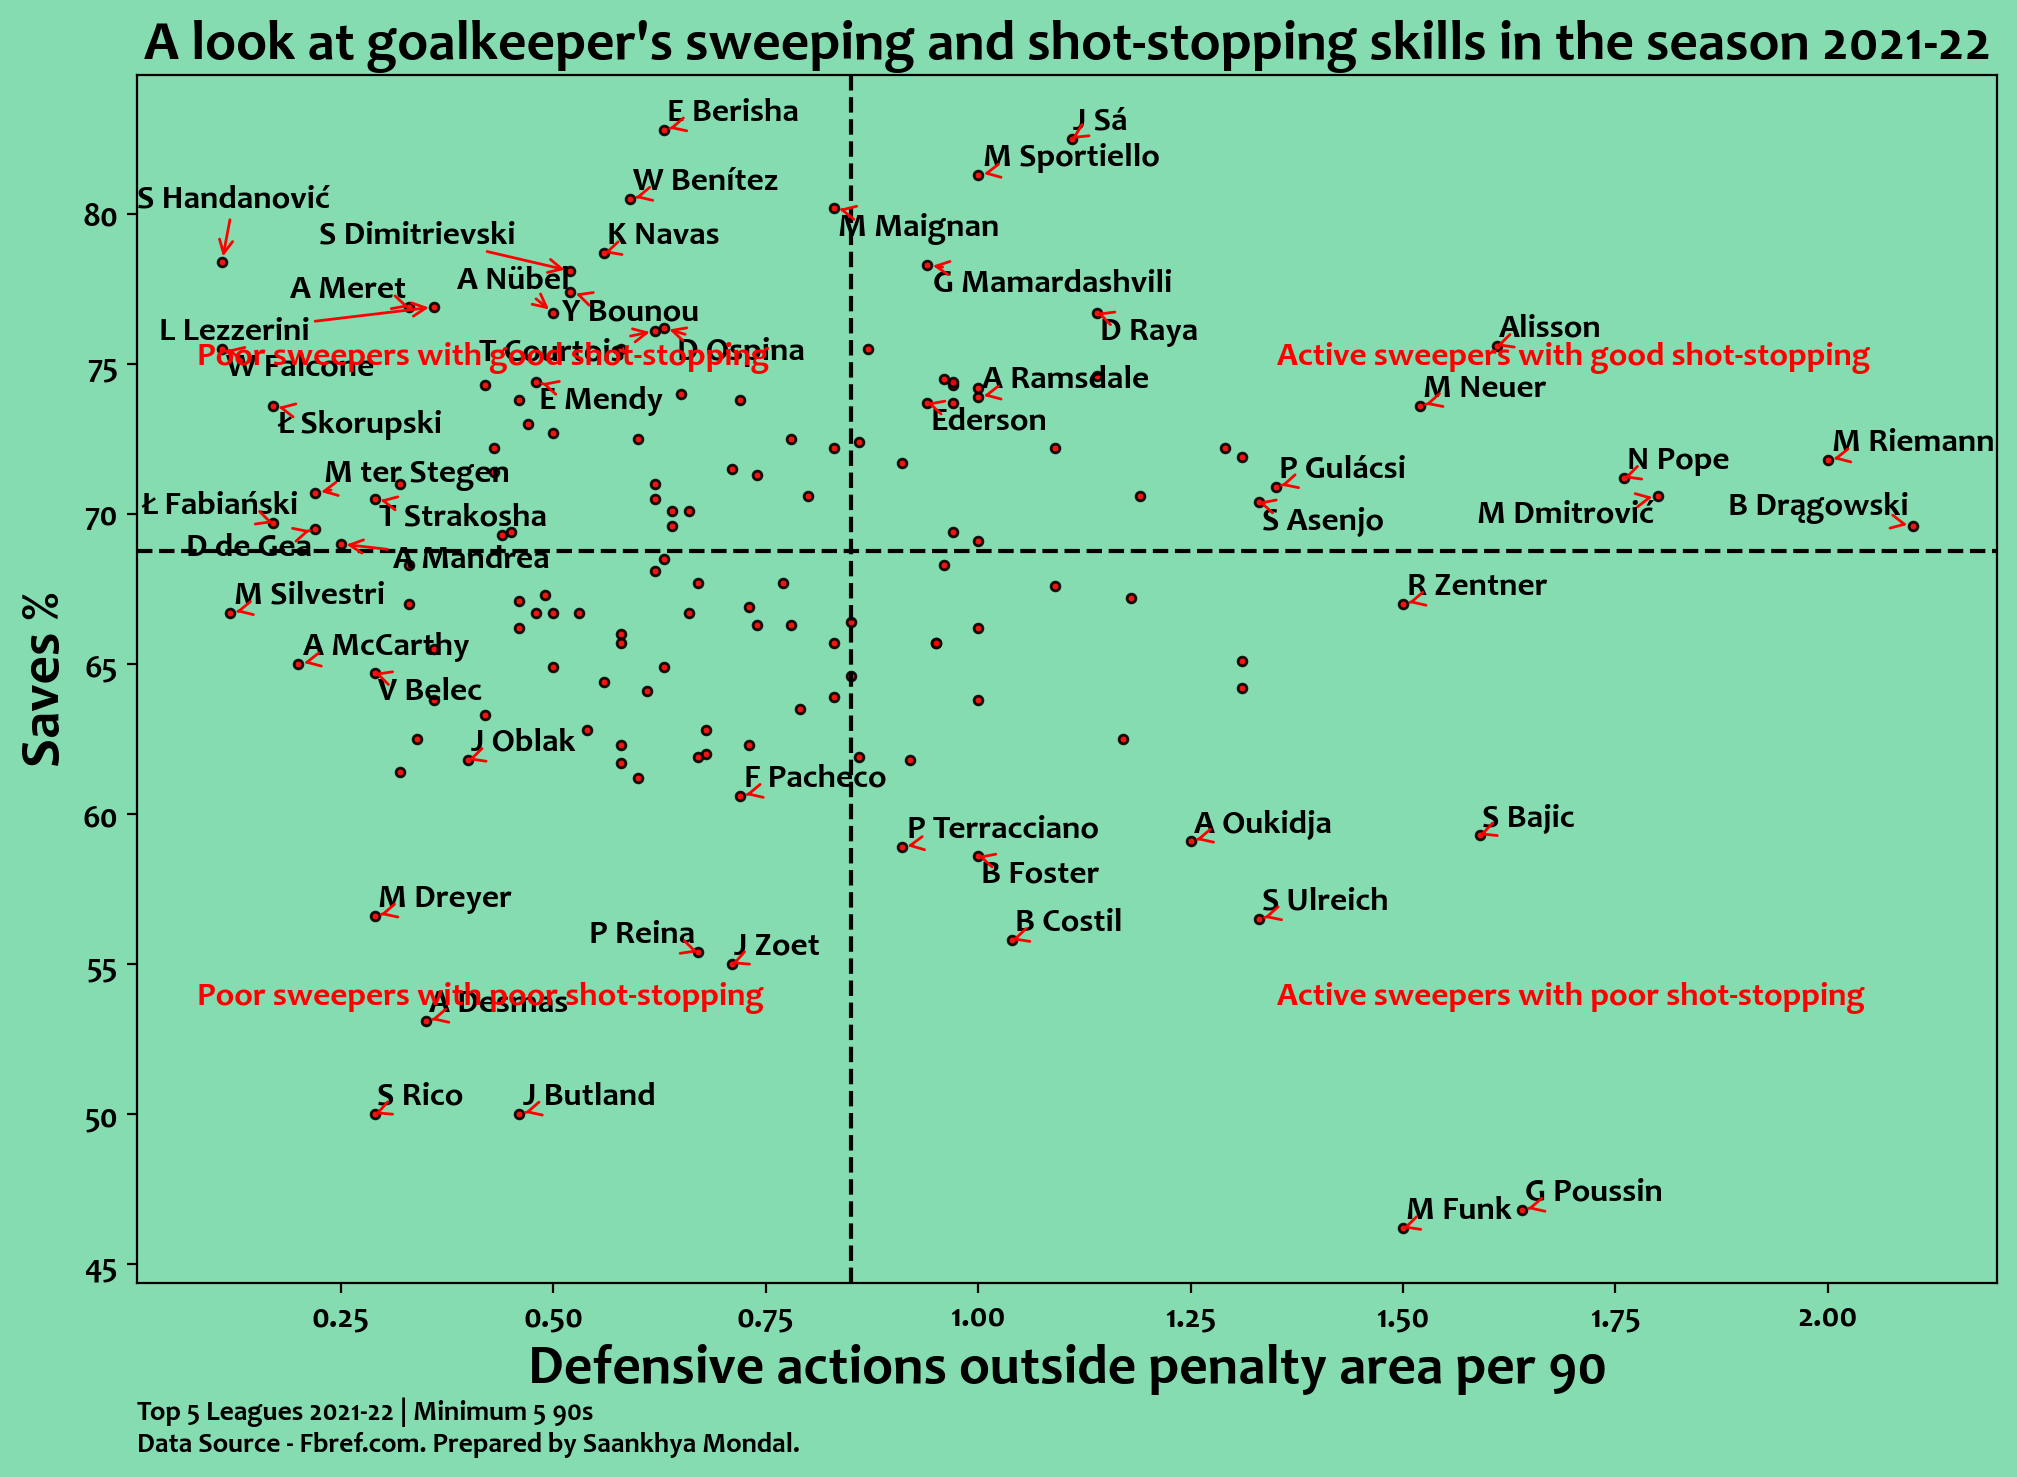

In [10]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
gks = ['Neuer', 'Alisson', 'Mendy', 'Ter Stegen', 'Oblak', 'Ederson', 'De Gea', 'Ramsdale', 'Courtois', 'Arrizabalaga']
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#85dcb0')
fig.set_facecolor('#85dcb0')
fig.set_edgecolor('#85dcb0')

outlier_top = data['Save%'].quantile(0.900)
outlier_bottom = data['Save%'].quantile(0.100)
outlier_right = data['#OPA/90'].quantile(0.900)
outlier_left = data['#OPA/90'].quantile(0.100)


ax.axhline(data['Save%'].quantile(0.5), ls='--', lw=1.5, c='#000000')
ax.axvline(data['#OPA/90'].quantile(0.65), ls='--', lw=1.5, c='#000000')

def check_name_present(name):
    for i in gks:
        if i in name:
            return True
    return False

par_x = list(data['#OPA/90'].astype(float))
par_y = list(data['Save%'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

fig.text(0.6,0.7,'Active sweepers with good shot-stopping', color = 'red', size=12)
fig.text(0.6,0.3,'Active sweepers with poor shot-stopping', color = 'red', size=12)
fig.text(0.15,0.7,'Poor sweepers with good shot-stopping', color = 'red', size=12)
fig.text(0.15,0.3,'Poor sweepers with poor shot-stopping', color = 'red', size=12)

ax.set_xlabel('Defensive actions outside penalty area per 90', fontsize=20)
ax.set_ylabel('Saves %', fontsize=20)
ax.set_title('A look at goalkeeper\'s sweeping and shot-stopping skills in the season 2021-22', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [11]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 205
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     200 non-null    object
 1   Nation     200 non-null    object
 2   Pos        200 non-null    object
 3   Squad      200 non-null    object
 4   Comp       200 non-null    object
 5   Age        200 non-null    object
 6   Born       200 non-null    object
 7   MP         200 non-null    object
 8   Starts     200 non-null    object
 9   Min        200 non-null    object
 10  90s        200 non-null    object
 11  GA_x       200 non-null    object
 12  GA90       200 non-null    object
 13  SoTA       200 non-null    object
 14  Saves      200 non-null    object
 15  Save%      196 non-null    object
 16  W          200 non-null    object
 17  D          200 non-null    object
 18  L          200 non-null    object
 19  CS         200 non-null    object
 20  CS%        196 non-null    objec